In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wid #package to interact with plots


<span style="font-family:chalkduster,fantasy;fontsize:90%;color:crimson">
<h1>Randomness and Probabilities</h1>


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Introducing the functions</h2>
    
Numpy has a submodule called `random` that allows us to deal with probabilities and randomeness. There are several functions within this submodule that will be useful to us.
    
|Function|What it does|
|:---:|:---:|
|`np.random.rand(nrow,ncol)`|Generates an array of `nrow` rows and `ncol` columns of random floats<br> between 0 and 1 from a uniform distribution|
|`np.random.randn(nrow,ncol)`|Generates an array of `nrow` rows and `ncol` columns of random floats<br> between 0 and 1 from a normal distribution|
|`np.random.randint(min,max,(nrow,ncol))`|Generates an array of `nrow` rows and `ncol` columns of random integers<br> between `min` (inclusive) and `max` (exclusive) from a uniform distribution|
|`np.random.choice(arr,p=p_arr,size=(nrow,ncol),replace=True)`|Generates an array of `nrow` rows and `ncol` columns from the given `arr`|
|`np.random.permutation(arr)`|Returns a permuted array of `arr`|
    
To make things simpler, if you prefer, you can import
    
`import numpy.random as r`

I won't do that however -- I have no idea why, but I just prefer typing out `numpy.random`. And I know it's not sensible. I just prefer it that way.

    
<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Monte Carlo Method I: Simple example</h2>
    
In this section, we will use the Monte Carlo Method on problems of increasing difficulty. Often times it's hard to appreciate the utility of the method when applying the Monte Carto Method to problems that are very simple. 
    
    
    
The basic principle behind the Monte Carlo Method is: Instead of doing the computation of difficult mathematics the probabilities through difficult mathematics, just 
    


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Card Game:</h3>
    
Here we consider two regular deck of 52 cards: Ace to King with four suits. A single-player game is played with this deck according to the following rules:
    
- 2 cards are dealt in each round of play.
- If the player get a consecutive numbers with the same suit, the player win.
    
Let us first attempt to do a Monte Carlo Simulation of this problem. To simulate this, we need to:
    
1. First define the sample space 
    - How do we model the 52 cards? Note that there are many ways to do this!
    - There's no reason to model both decks. One deck is sufficient.
    - The only reason I'm giving you two decks is so that you don't have to worry about removing the first card from the deck for the second draw (i.e you can leave the `replace=True` in the `np.random.choice` function)
2. Next, define a function that deals out 2 cards randomly.
3. Define a function that checks if the hand wins or loses (i.e. is a straight with the same suit)
4. Define a function that runs the previous two functions 10000 times and collates the results.
    - If we denote the losing result as 0 and winning result as 1, the average of the results will give you the probability of winning in a random run!

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
<h3 style="font-family:chalkduster; color:tan">In-Class Example #2e: Calculating the probability!</h3>

In [5]:
1/4*2/13

0.038461538461538464

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster;color:tan">In-Class Example #2f: Correct solution to Card Game</h3>
    
The code below is the solution that we coded together in the last class. How do we incorporate the correction to it?

In [6]:
Value=np.linspace(1,13,13)
Suit=np.linspace(1,4,4)

def RandHand():
    Hand=np.zeros((2,2))
    for i in range(2):
        Hand[i,0]=np.random.choice(Value)
        Hand[i,1]=np.random.choice(Suit)
    return Hand

def Win(Hand):
    if len(np.unique(Hand[:,1]))==1  and np.abs(np.diff(Hand[:,0]))==1:
        return 1
    else:
        return 0
    
def MonteCarlo(N):
    out=np.zeros(N)
    for i in range(N):
        out[i]=Win(RandHand())
    return np.mean(out)

In [7]:
MonteCarlo(50000)

0.03484

    
<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h2 style="font-family:chalkduster; color:darkviolet">Monte Carlo Method II: Monty Hall Problem</h2>

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Simulation:</h3>
    
Here we are going to use the Monte Carlo method to simulate playing of the Monte Hall gameshow. We will simulate playing the game $N$ number of times, switching everytime the game host reveals the goat behind one door. Averaging over the result of this simulation will allow us to find the probability of winning if we switch.
    
As with all our Monte Carlo simulations, we will have four steps: 
    
1. Defining the Sample Space: 
    - Throughout this simulation, we will call the three doors `1`, `2` and `3`.  
2. Initializing a random run:
    - The first function `initialize()` will initialize the car randomly behind one of the three doors, as well as simulate a player's random choice of a door.
3. Performing the deterministic computation:
    - The second function `DC()` will take in the simulate the gameshow host revealing the goat behind one of the other two doors and simulate the player's choice to switch doors, returning the result as a win (player's final choice is the door with the car) or loss (player's final choice is one of the doors with the goat).
4. Repeating it N times and averaging:
    - The last function `MonteCarlo()` will simulate us doing N runs `initialize()` and `DC()` and averaging the results.
    
To start us off, let us define the sample space!
</span>

In [11]:
SampleSpace=np.linspace(1,3,3)

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #3a: Initializing the variables</h3>
    
Write a function called `initialize()` that does not take in any variable and outputs an array of length 2, both of which are random choices of either `1`, `2` or `3`.
    
We will interpret the first entry of this array will be the the door behind which the car is located, and the second entry of the array will be the player's choice of door.

In [12]:
# 1st row: car location, 2nd row: player's choice 
def initialize():
    return np.random.choice(SampleSpace,size=2)

In [14]:
initialize()

array([1., 2.])

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #3b: Performing the deterministic computation</h3>
    
Write a function called `DC()` that takes in the array of length 2 returned by `initialize()` and outputs either 0 (player lost) or 1 (player won). Recall that incoporated in this computation is the fact that the game show host reveals the goat behind one of the other two doors, and the player switches from his original door choice.
    
Note that we do not actually explicitly include in our code the revealing of the goat by the game show host. What we need is abstraction! Basically, distilling out the essence of what would happen in every scenario! So let's consider the possible cases below. For simplicity, I will call the door behind which the car is located `CarLoc` and the player's initial door choice `DoorChoice`.
    
1. If the `CarLoc==DoorChoice` (that is the player's initial choice was indeed the winning door!)
    1. There are two possible doors that have goats behind them, and the game show host will randomly choose one of them to reveal.
    2. Regardless of which door the game show host reveals however, the player will lose when he switches to the third door!
2. If the `CarLoc!=DoorChoice` (that is, the player's initial choice was one of the doors with the goat)
    1. The game show host will reveal the only other door with the goat. 
    2. The player will switch to the only other door... which is the winning door!

In [16]:
def DC(arr):
    if arr[0]==arr[1]:
        return 0 
    else: 
        return 1

In [22]:
x=initialize()
print(x,DC(x))
# 무조건 바꾼다고 가정했으니까 arr[0]=arr[1]이면 0점인거임

[2. 1.] 1


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #3c: Repetition and averaging over the result</h3>
    
This last function of the Monte Carlo simulation is always very similar. It takes it a positive integer N and repeats the `DC()` and `initialize()` N times, returning the average of the result.

In [23]:
def MonteCarlo(N):
    out=np.zeros(N)
    for i in range(N):
        out[i]=DC(initialize())
    return np.mean(out)

In [24]:
MonteCarlo(10)

0.8

In [27]:
# to check your function works
N=10
out=np.zeros(N)
for i in range(N):
    x=initialize()
    out[i] = DC(x)
    print(x,DC(x))
print(np.mean(out))

[1. 2.] 1
[2. 3.] 1
[2. 2.] 0
[3. 2.] 1
[3. 3.] 0
[3. 1.] 1
[2. 2.] 0
[1. 3.] 1
[3. 2.] 1
[1. 2.] 1
0.7


<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:steelblue">Accuracy over many repetitions:</h3>
    
It ought to be clear that for the Monte Carlo simulation to be accurate, one ought to do the random sampling over a very large number of N. In this section, we will plot a graph to visually appreciate this! Our aim is to produce something like: 
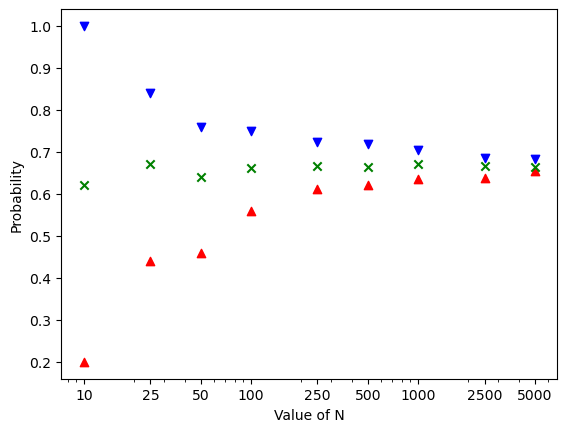
    
This graph will help you determine how many runs is sufficiently large that you are able to trust your results.
</span>

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

In order to understand the graph, take note of the following:
- The x axis of the graph denotes the number of repetition `N` in each Monte Carlo simulation done. 
    - In this graph, we will choose 9 different values for N: [10,25,50,100,250,500,1000,2500,5000]
- For each `N`, we will do 50 runs of the Monte Carlo simulation.
    - That is, for `N=10`, we run `MonteCarlo(10)` 50 times.
    - And for `N=25`, we will run `MonteCarlo(25)` another 50 times
    - And so on and so forth
- For each `N`, we will obtain the average of the 50 runs, as well as the maximum and minimum value over the 50 runs.
    - The result of this will be saved in a 9 by 3 array. 
    - Each row if this array will represent one of the 9 different `N` values.
    - The first column of this array will represent the minimum value.
    - The second column of this array will represent the average value.
    - The third column of this array will represent the maximum value.

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">

<h3 style="font-family:chalkduster; color:tan">In-Class Example #4: Statistics</h3>

In this example, we will attempt to reproduce the graph above by creating the 9 by 3 output array to store the output above.

The array `N`, and the output array to plot the graphs `out` has been defined below. A temporary array of length 50 `temp` has also been predefined in the event that you need it. The code to plot the graph has also been written for you below.

In [29]:
N=np.array([10,25,50,100,250,500,1000,2500,5000])
out=np.zeros((len(N),3))
temp=np.zeros(50) # temporary array

<span style="font-family:Trebuchet MS,sans-serif;fontsize:90%">
    
For those who require some hints:
- First, write a for loop that runs the Monte Carlo simulation 50 times for `N=10`.
- Store those results in the temporary array.
- Obtain the min, average and maximum of those 50 runs for N=10, and store them in the first row of `out`.
- Write up a second for loop to run the previous three steps for all the other `N` values.

In [32]:
# to see how it works
# N=np.array([10,25,50,100,250,500,1000,2500,5000])
N=10

for i in range(50):
    temp[i]=MonteCarlo(N) # MonteCarlo가 N번 돌렸을때 win할 확률의 평균값이니까
    out[0,0]=np.min(temp)
    out[0,1]=np.mean(temp)
    out[0,2]=np.max(temp)
    
print(out)

[[0.3   0.698 0.9  ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]


In [34]:
# N=np.array([10,25,50,100,250,500,1000,2500,5000])
N=10

for i in range(50):
    temp[i]=MonteCarlo(N) # MonteCarlo가 N번 돌렸을때 win할 확률의 평균값이니까
    out[0,0]=np.min(temp)
    out[0,1]=np.mean(temp)
    out[0,2]=np.max(temp)
    
N=25
for i in range(50):
    temp[i]=MonteCarlo(N) # MonteCarlo가 N번 돌렸을때 win할 확률의 평균값이니까
    out[1,0]=np.min(temp)
    out[1,1]=np.mean(temp)
    out[1,2]=np.max(temp)
    
N=50
for i in range(50):
    temp[i]=MonteCarlo(N) # MonteCarlo가 N번 돌렸을때 win할 확률의 평균값이니까
    out[2,0]=np.min(temp)
    out[2,1]=np.mean(temp)
    out[2,2]=np.max(temp)
    
print(out)

# 이렇게 채워져나간다는걸 알수있음

[[0.2    0.652  1.    ]
 [0.48   0.6776 0.88  ]
 [0.56   0.6656 0.84  ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]
 [0.     0.     0.    ]]


In [35]:
N=np.array([10,25,50,100,250,500,1000,2500,5000])


for j in range(len(N)): #여기에선 len(N)=9. 그래서 first arr에 j가 들어가는거임
    for i in range(50):
        temp[i]=MonteCarlo(N[j]) 
        out[j,0]=np.min(temp)
        out[j,1]=np.mean(temp)
        out[j,2]=np.max(temp)
    
print(out)

[[0.4      0.676    0.9     ]
 [0.4      0.6432   0.8     ]
 [0.54     0.6836   0.86    ]
 [0.53     0.6726   0.75    ]
 [0.592    0.6664   0.732   ]
 [0.616    0.66864  0.712   ]
 [0.631    0.66534  0.695   ]
 [0.6436   0.667376 0.686   ]
 [0.6532   0.666316 0.6778  ]]


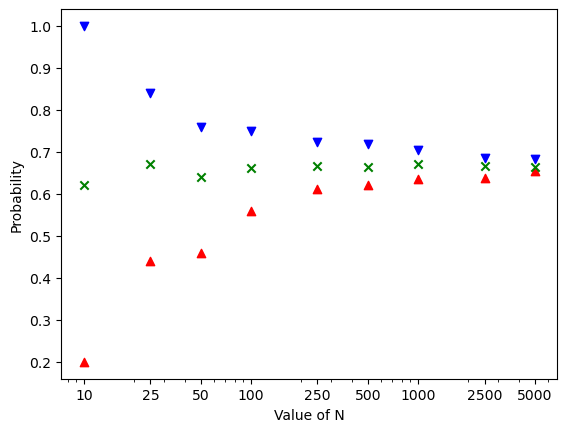

In [34]:
plt.scatter(N,out[:,0],color="red",marker="^");
plt.scatter(N,out[:,1],marker="x",color="green");
plt.scatter(N,out[:,2],color="blue",marker="v");
plt.xscale("log")
plt.xticks(N,N);
plt.xlabel("Value of N");
plt.ylabel("Probability");